  ##  MULTIPLE LINEAR REGRESSION

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning
* Data Pre-Processing
* Data Visualization
* Building Multiple Linear Regression Model

DATA SET : BigMart Sales Data

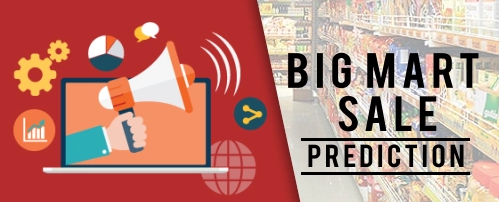

| Variable               | Description                                                                                        |
| -------------          | ---------------------------------------------------------------------------------------------------|
|ItemWeight              |Weight of product                                                                                   |
|ItemFatContent          |Whether the product is low fat or not                                                               |
|ItemVisibility          |The % of the total display area of all products in a store allocated to the particular product      |
|ItemType                |The category to which the product belongs                                                           |
|ItemMRP                 |Maximum Retail Price (list price) of the product                                                    |
|OutletIdentifier        |Unique store ID                                                                                     |
|OutletEstablishmentYear |The year in which the store was established                                                         |
|OutletSize              |The size of the store in terms of ground area covered                                               |
|OutletLocationType      |The type of city in which the store is located                                                      |
|OutletType              |Whether the outlet is just a grocery store or some sort of supermarket                              |
|ItemOutletSales         |sales of the product in t particular store. This is the outcome variable to be predicted.           |

Importing required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('Bigmrttrain.csv')
fnltest=pd.read_csv('Bigmrttest.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
fnltest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Shape of the Train data :

In [7]:
print('Shape of the Train data :',df.shape)
print('No of Rows    :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (8523, 12)
No of Rows    : 8523
No of columns : 12


Shape of the Given Test Data :

In [8]:
print('Shape of the Test data :',fnltest.shape)
print('No of Rows    :',fnltest.shape[0])
print('No of columns :',fnltest.shape[1])

Shape of the Test data : (5681, 11)
No of Rows    : 5681
No of columns : 11


Viewing the Data Types :

In [9]:
print ("Train Data set dtypes :\n")
print(df.dtypes)
print('--------------------------')
print("Test Data set dtypes :\n ")
print(fnltest.dtypes)

Train Data set dtypes :

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
--------------------------
Test Data set dtypes :
 
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


Now consider the given train data :

Viewing the info :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Univariate Analysis :

Viewing the columns :

In [12]:
for i in df.columns :
    print(i)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


Consider the Object columns:

In [13]:
objcols=df.select_dtypes('object')
objcols.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [14]:
for i in objcols.columns :
    print(i,'has',objcols[i].nunique(),'levels \n','Values:',objcols[i].unique())
    print('---------------------------------------------------\n')

Item_Identifier has 1559 levels 
 Values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
---------------------------------------------------

Item_Fat_Content has 5 levels 
 Values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
---------------------------------------------------

Item_Type has 16 levels 
 Values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
---------------------------------------------------

Outlet_Identifier has 10 levels 
 Values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
---------------------------------------------------

Outlet_Size has 3 levels 
 Values: ['Medium' nan 'High' 'Small']
---------------------------------------------------

Outlet_Location_Type has 3 levels 
 Values: ['Tier 1' 'Tier 3' 'Tier 2']
-----------------------------------

In [15]:
# Item_Fat :
df.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can observe that LF,low fat, Low Fat and Regular,reg  levels are duplicated 

In [16]:
df.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

similarly we will replace the Item_fat_content values in the Test data :

In [17]:
fnltest.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [18]:
fnltest.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
fnltest.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [19]:
# Item_Type :
df.Item_Type.value_counts(dropna=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Looking at the Value counts for the object columns :

In [20]:
for i in objcols.columns[objcols.columns !='Item_Identifier'] :
    print('column Name :',i,'\n',df[i].value_counts(dropna=False),'\n-----------------------------------------')

column Name : Item_Fat_Content 
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 
-----------------------------------------
column Name : Item_Type 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 
-----------------------------------------
column Name : Outlet_Identifier 
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 
-----------------------------------------
column Name : Outlet_

As we can observe from the above there are no duplicate levels for all the object columns , but for 'Item_Identifier' there are 1559 levels and if we observe that the first two strings will form the less no of levels.

So we will extract the first two letters from that column :

In [21]:
# we extract the first two letters from the column and give it to the new column 'ID' :
df['ID']=df.Item_Identifier.apply(lambda x : x[:2] )
df.ID.value_counts(dropna=False)

FD    6125
NC    1599
DR     799
Name: ID, dtype: int64

Similarly we will do for the Test set :

In [22]:
fnltest['ID']=fnltest.Item_Identifier.apply(lambda x :x[:2])
fnltest.ID.value_counts(dropna=False)

FD    4076
NC    1087
DR     518
Name: ID, dtype: int64

Consider the Numeric cols :

In [23]:
numcols=df.select_dtypes(np.number)
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [24]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


checking the Null Values :

In [25]:
numcols.isnull().sum()/numcols.shape[0]

Item_Weight                  0.171653
Item_Visibility              0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Item_Outlet_Sales            0.000000
dtype: float64

As we can observe that there are 17% missing values in the 'Item_Weight' column ,we can impute them with mean or median but not now after doing Bivariate analysis we can decide whether to impute or there is a pattern in the Missing Values 

Look at for the outliers :

one of the ways to easily Identify the outliers is to draw Box-plots :

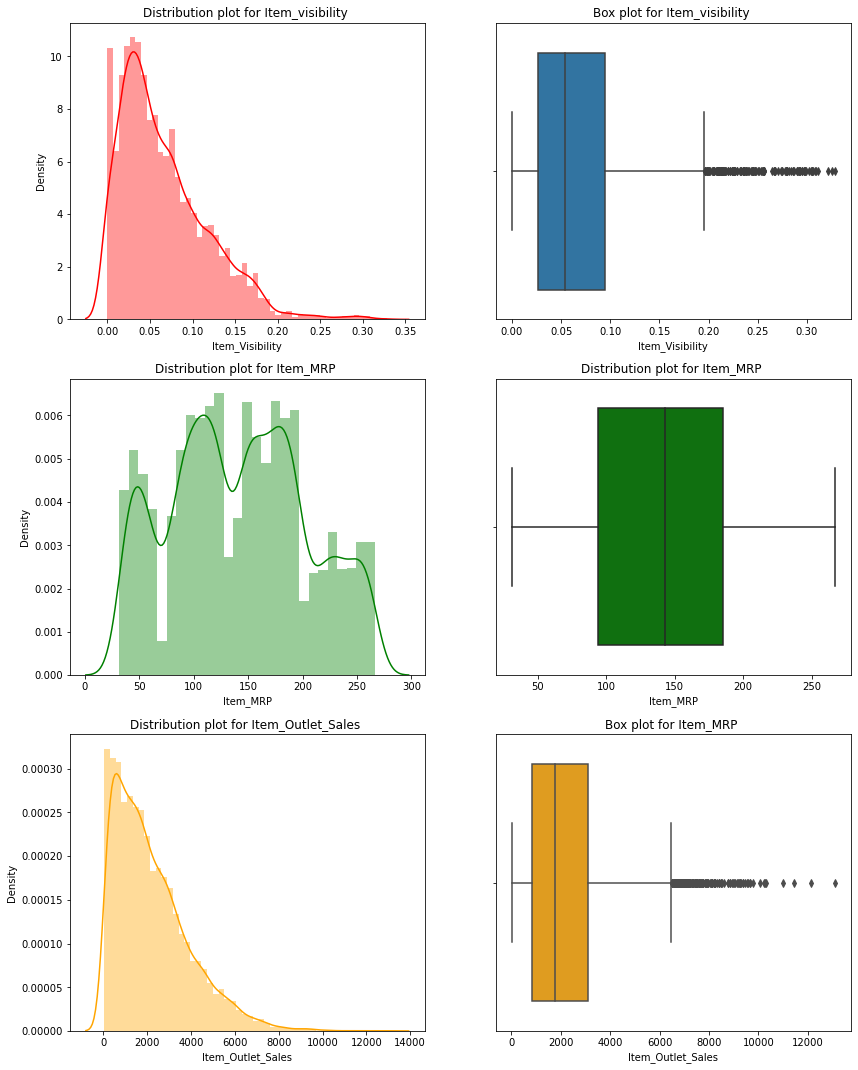

In [26]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.distplot(df.Item_Visibility,kde=True,color='r')
plt.title('Distribution plot for Item_visibility ')

plt.subplot(3,2,2)
sns.boxplot(df.Item_Visibility)
plt.title('Box plot for Item_visibility ')

plt.subplot(3,2,3)
sns.distplot(df.Item_MRP,kde=True,color='g')
plt.title('Distribution plot for Item_MRP ')

plt.subplot(3,2,4)
sns.boxplot(df.Item_MRP,color='g')
plt.title('Distribution plot for Item_MRP ')

plt.subplot(3,2,5)
sns.distplot(df.Item_Outlet_Sales,kde=True,color='orange')
plt.title('Distribution plot for Item_Outlet_Sales ')

plt.subplot(3,2,6)
sns.boxplot(df.Item_Outlet_Sales,color='orange')
plt.title('Box plot for Item_MRP ')

plt.subplots_adjust(top=2,bottom=1)
plt.show()

As we can observe that,The Item_Visibility distribution is right skewed i.e., most of the observations lie towards the left end. 
from the box plot 50% of the data points lie in the range of (0.00,0.05) and also outliers are present.

For the Item_MRP there are no outliers but the distribution looks like it is a bimodal distribution , the reason may be due to the segmentation of Food Items.

For the Item_outlet_sales which is our Target column is also right skewed and also outliers are present.
we can treat the outliers seperately i.e., we will try to find out the reasons why these are present due to high significant factors or some  typo mistakes 

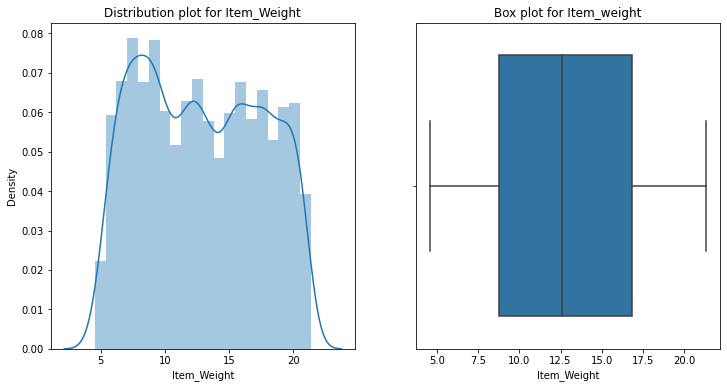

In [27]:
# For Item_Weight : we will extract those values which are not null and see the distribution.

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df[~df.Item_Weight.isnull()]['Item_Weight'],kde=True)
plt.title('Distribution plot for Item_Weight')

plt.subplot(1,2,2)
sns.boxplot(df[~df.Item_Weight.isnull()]['Item_Weight'])
plt.title('Box plot for Item_weight')

plt.show()


For the non null values of the Item_weights we can observe that there are no outliers by looking at the Box plot

Outlet_Establishment_Year : Although it is read as Numeric column we will treat this column by extracting the no of years from the established year

First we will look at the plot for the establishment_year :

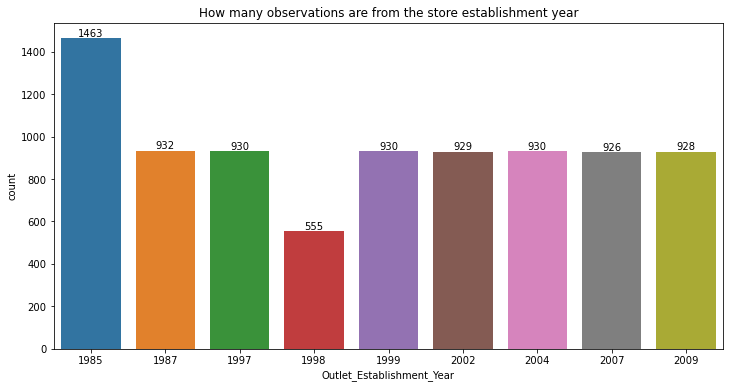

In [28]:
plt.figure(figsize=(12,6))
fig=sns.countplot(data=df,x='Outlet_Establishment_Year')
fig.bar_label(fig.containers[0])
plt.title('How many observations are from the store establishment year')
plt.show()

Now we will convert the Establishment year column  in to the  No of years from the establishment year to the data presented year. so we will subtract it from the year 2017.

In [29]:
df['Outlet_age']=2017-df.Outlet_Establishment_Year
# Test data :
fnltest['Outlet_age']=2017-fnltest.Outlet_Establishment_Year
print(df['Outlet_age'].head())
print('----------')
print(fnltest['Outlet_age'].head())

0    18
1     8
2    18
3    19
4    30
Name: Outlet_age, dtype: int64
----------
0    18
1    10
2    19
3    10
4    32
Name: Outlet_age, dtype: int64


Bivariate Analysis :

checking the Null values for the Train data set :

In [30]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
ID                              0
Outlet_age                      0
dtype: int64

In [31]:
l=['ID','Item_Identifier','Item_Fat_Content','Item_Type','Item_MRP','Item_Weight']
df[df.Item_Weight.isnull()][l].head(15)

,ID,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Item_Weight
7,FD,FDP10,Low Fat,Snack Foods,107.7622,NaN
18,DR,DRI11,Low Fat,Hard Drinks,113.2834,NaN
21,FD,FDW12,Regular,Baking Goods,144.5444,NaN
23,FD,FDC37,Low Fat,Baking Goods,107.6938,NaN
29,FD,FDC14,Regular,Canned,43.6454,NaN
36,FD,FDV20,Regular,Fruits and Vegetables,128.0678,NaN
38,FD,FDX10,Regular,Snack Foods,36.9874,NaN
39,FD,FDB34,Low Fat,Snack Foods,87.6198,NaN
49,FD,FDS02,Regular,Dairy,196.8794,NaN
59,FD,FDI26,Low Fat,Canned,180.0344,NaN


As we can observe that there are Item_weight missing values for all the Item_types , so it is better to impute them with the mean/median values of the Item-Type and Item_weights.

In [32]:
l=['Item_Type','Item_Weight']
wght=df[~(df.Item_Weight.isnull())][l]
wght.head()

,Item_Type,Item_Weight
0,Dairy,9.30
1,Soft Drinks,5.92
2,Meat,17.50
3,Fruits and Vegetables,19.20
4,Household,8.93


In [33]:
# we can verify the null values count by subtracting the wght data frame rows from the df data frame 
df.shape[0]-wght.shape[0]

1463

In [34]:
wght.Item_Type.value_counts()

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [35]:
print('Mean Values of Item_Weight\n',wght.Item_Weight.groupby(wght.Item_Type).mean())
print('-------------------------------------------')
print('Median Values of Item_Weight\n',wght.Item_Weight.groupby(wght.Item_Type).median())

Mean Values of Item_Weight
 Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64
-------------------------------------------
Median Values of Item_Weight
 Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.

As we can observe that the Mean and the Median values are not that much significantly different.

so we can Impute them with the Median values.

In [36]:
wght.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Breads',
       'Canned', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Dairy'),'Item_Weight']=13.35
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Soft Drinks'),'Item_Weight']=11.80
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Meat'),'Item_Weight']=12.35
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Fruits and Vegetables'),'Item_Weight']=13.10
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Household'),'Item_Weight']=13.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Baking Goods'),'Item_Weight']=11.65
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Snack Foods'),'Item_Weight']=13.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Frozen Foods'),'Item_Weight']=12.85
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Breakfast'),'Item_Weight']=10.69
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Health and Hygiene'),'Item_Weight']=12.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Hard Drinks'),'Item_Weight']=10.10
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Breads'),'Item_Weight']=10.60
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Canned'),'Item_Weight']=12.15
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Starchy Foods'),'Item_Weight']=13.17
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Others'),'Item_Weight']=14.5
df.loc[(df.Item_Weight.isnull()) & (df.Item_Type=='Seafood'),'Item_Weight']=11.65

In [38]:
df.Item_Weight.isnull().sum()

0

Similarly we will do it for the Test Data :

First we will check the Null values for the Test set :

In [39]:
fnltest.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
ID                              0
Outlet_age                      0
dtype: int64

In [40]:
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Dairy'),'Item_Weight']=13.35
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Soft Drinks'),'Item_Weight']=11.80
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Meat'),'Item_Weight']=12.35
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Fruits and Vegetables'),'Item_Weight']=13.10
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Household'),'Item_Weight']=13.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Baking Goods'),'Item_Weight']=11.65
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Snack Foods'),'Item_Weight']=13.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Frozen Foods'),'Item_Weight']=12.85
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Breakfast'),'Item_Weight']=10.69
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Health and Hygiene'),'Item_Weight']=12.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Hard Drinks'),'Item_Weight']=10.10
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Breads'),'Item_Weight']=10.60
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Canned'),'Item_Weight']=12.15
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Starchy Foods'),'Item_Weight']=13.17
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Others'),'Item_Weight']=14.5
fnltest.loc[(fnltest.Item_Weight.isnull()) & (fnltest.Item_Type=='Seafood'),'Item_Weight']=11.65

In [41]:
fnltest.Item_Weight.isnull().sum()

0

In [42]:
# Now consider the Outlet_size column :
df.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
# Calculating the percentage of Missing Values for the Outlet_Size column :
print('% of outlet_size missing values :',df.Outlet_Size.isnull().sum()/df.shape[0] * 100)

% of outlet_size missing values : 28.27642848762173


First we will fill these Null values with the Missing :

In [44]:
df.Outlet_Size.fillna('Missing',inplace=True)

In [45]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'ID', 'Outlet_age'],
      dtype='object')

In [46]:
l=['Outlet_Establishment_Year', 'Outlet_Location_Type','Outlet_Type','Outlet_age','Outlet_Size']
outlet=df[df.Outlet_Size=='Missing'][l]
outlet.head(15)

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_age,Outlet_Size
3,1998,Tier 3,Grocery Store,19,Missing
8,2002,Tier 2,Supermarket Type1,15,Missing
9,2007,Tier 2,Supermarket Type1,10,Missing
25,2007,Tier 2,Supermarket Type1,10,Missing
28,1998,Tier 3,Grocery Store,19,Missing
30,1998,Tier 3,Grocery Store,19,Missing
33,2002,Tier 2,Supermarket Type1,15,Missing
45,1998,Tier 3,Grocery Store,19,Missing
46,2002,Tier 2,Supermarket Type1,15,Missing
47,2002,Tier 2,Supermarket Type1,15,Missing


In [47]:
print('Outlet-Age values :',outlet.Outlet_age.unique())
print('Outlet-Location values :',outlet.Outlet_Location_Type.unique())
print('Outlet-Type values :',outlet.Outlet_Type.unique())

Outlet-Age values : [19 15 10]
Outlet-Location values : ['Tier 3' 'Tier 2']
Outlet-Type values : ['Grocery Store' 'Supermarket Type1']


In [48]:
df[(df.Outlet_Location_Type=='Tier 2') & (df.Outlet_Type=='Supermarket Type1')]['Outlet_Size'].value_counts()

Missing    1855
Small       930
Name: Outlet_Size, dtype: int64

In [49]:
outlet[(outlet.Outlet_Location_Type=='Tier 2') & (outlet.Outlet_Type=='Supermarket Type1')]['Outlet_Size'].value_counts()

Missing    1855
Name: Outlet_Size, dtype: int64

In [50]:
df[(df.Outlet_Location_Type=='Tier 3') & (df.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Name: Outlet_Size, dtype: int64

In [51]:
df[(df.Outlet_Location_Type=='Tier 3')]['Outlet_Size'].value_counts()

Medium     1863
High        932
Missing     555
Name: Outlet_Size, dtype: int64

In [52]:
df[(df.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Small      528
Name: Outlet_Size, dtype: int64

In [53]:
outlet[(outlet.Outlet_Location_Type=='Tier 3') & (outlet.Outlet_Type=='Grocery Store')]['Outlet_Size'].value_counts()

Missing    555
Name: Outlet_Size, dtype: int64

We can replace the Missing values of the Outlet_Size with the Values  :

  If the outlet's loaction type is 'Tier 2' we replace with the 'Small'
  
  If the outlet's location type is 'Tier 3' we replace with the 'Small' i.e., we can fill the null values by Small.

In [54]:
df.Outlet_Size.replace('Missing','Small',inplace=True)
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Similarly we can do it for the Test set :

In [55]:
# checking the null values for the Test set :
fnltest[fnltest.Outlet_Size.isnull()][l].head(15)

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_age,Outlet_Size
1,2007,Tier 2,Supermarket Type1,10,NaN
2,1998,Tier 3,Grocery Store,19,NaN
3,2007,Tier 2,Supermarket Type1,10,NaN
8,2002,Tier 2,Supermarket Type1,15,NaN
9,2007,Tier 2,Supermarket Type1,10,NaN
10,2007,Tier 2,Supermarket Type1,10,NaN
11,2002,Tier 2,Supermarket Type1,15,NaN
16,2002,Tier 2,Supermarket Type1,15,NaN
19,1998,Tier 3,Grocery Store,19,NaN
25,1998,Tier 3,Grocery Store,19,NaN


In [56]:
fnltest.Outlet_Size.fillna('Small',inplace=True)

so the Missing value Treatment is done

In [57]:
# checking the Null values for both the Train and Test data sets :
print('Train\n',df.isnull().sum())
print('-----------------------------')
print('Test\n',fnltest.isnull().sum())

Train
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
ID                           0
Outlet_age                   0
dtype: int64
-----------------------------
Test
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
ID                           0
Outlet_age                   0
dtype: int64


In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,18
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,18
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,19
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,30


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  ID                         8523 non-null   object 
 13  Outlet_age                 8523 non-null   int64

Now the Data is not having any missing values and all the duplicate levels are removed.

Visualizing the Data :

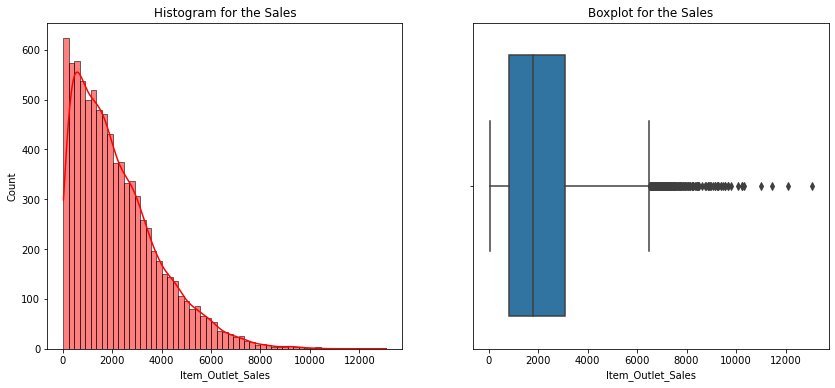

In [60]:
# Let's Look at the Target Variable 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df.Item_Outlet_Sales,kde=True,color='Red')
plt.title("Histogram for the Sales")

plt.subplot(1,2,2)
sns.boxplot(df.Item_Outlet_Sales)
plt.title("Boxplot for the Sales")

plt.show()

As we can observe that there are outliers and also it is right skewed

In [61]:
# Let's look at the observations where sales lie in the right portion of the box-plot
df.Item_Outlet_Sales.quantile([0.80,0.85,0.90,0.95,0.96,0.97,0.98])

0.80    3453.504600
0.85    3937.874100
0.90    4570.051200
0.95    5522.811000
0.96    5816.428800
0.97    6094.307088
0.98    6623.831144
Name: Item_Outlet_Sales, dtype: float64

In [62]:
hghsales=df[df.Item_Outlet_Sales > df.Item_Outlet_Sales.quantile(0.97)]
hghsales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID,Outlet_age
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,FD,8
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.5200,FD,8
130,FDY25,12.150,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,FD,32
132,NCR53,12.150,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524,NC,32
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060,FD,18


In [63]:
hghsales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,12.800898,0.056769,220.834352,1992.992188,7278.671244,24.007812
std,3.188863,0.038833,32.015235,9.183101,1123.918394,9.183101
min,5.695000,0.000000,125.933600,1985.000000,6096.064800,8.000000
25%,11.225000,0.025970,191.083300,1985.000000,6473.573400,15.000000
50%,13.100000,0.053694,227.439100,1987.000000,6967.929900,30.000000
75%,13.650000,0.078603,248.682900,2002.000000,7688.658400,32.000000
max,21.350000,0.175143,266.588400,2009.000000,13086.964800,32.000000


Let's compare the overall sales and the High sales :

In [64]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'ID', 'Outlet_age'],
      dtype='object')

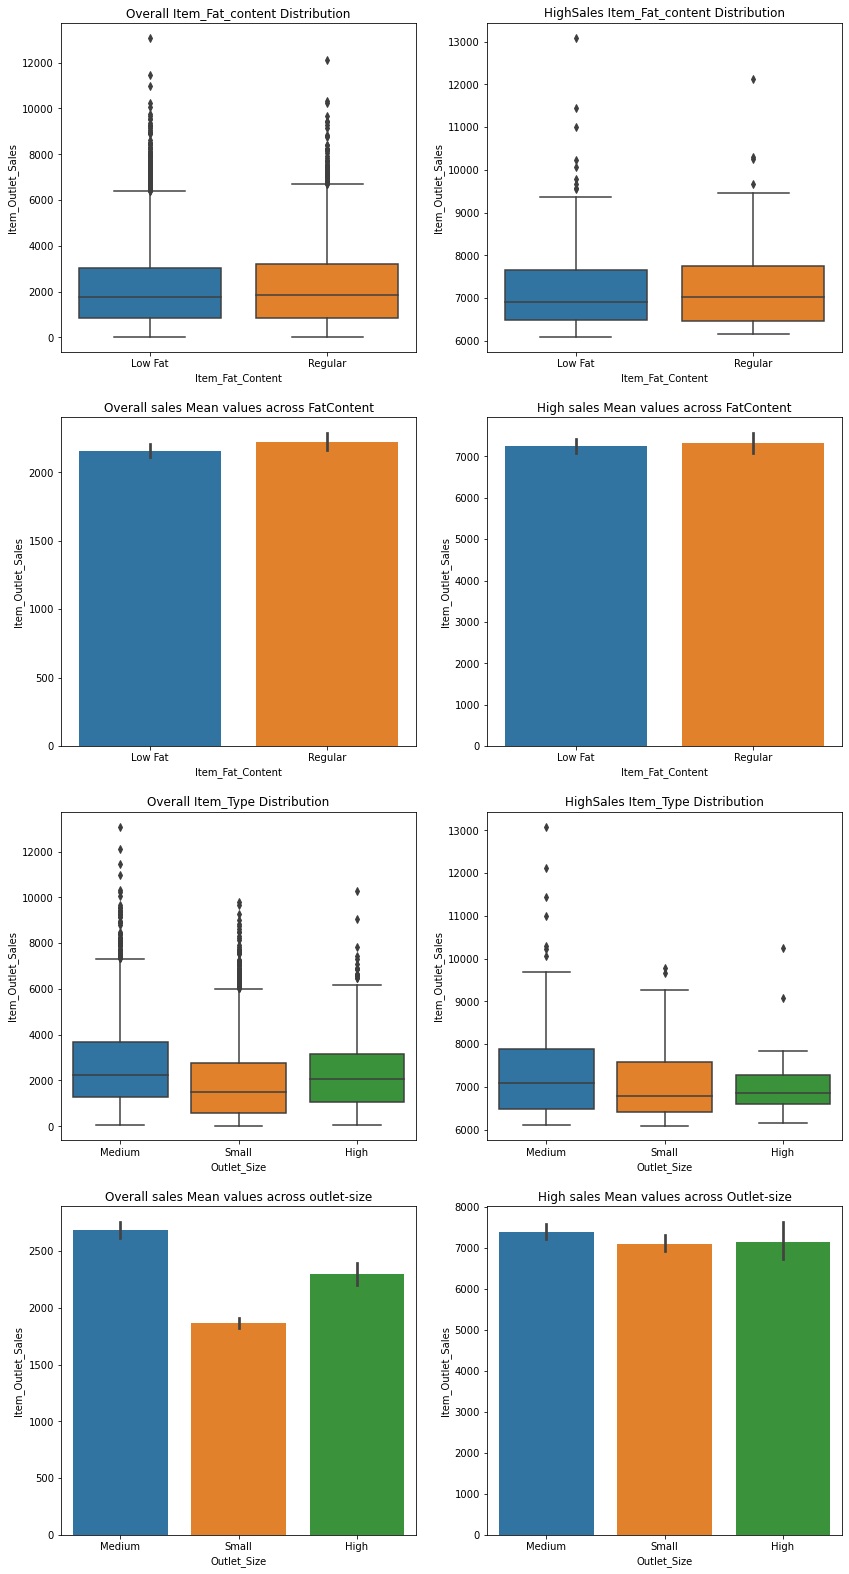

In [65]:
plt.figure(figsize=(14,14))
plt.subplot(4,2,1)
sns.boxplot(df.Item_Fat_Content,df.Item_Outlet_Sales)
plt.title("Overall Item_Fat_content Distribution")

plt.subplot(4,2,2)
sns.boxplot(hghsales.Item_Fat_Content,hghsales.Item_Outlet_Sales)
plt.title("HighSales Item_Fat_content Distribution")


plt.subplot(4,2,5)
sns.boxplot(df.Outlet_Size,df.Item_Outlet_Sales)
plt.title("Overall Item_Type Distribution")

plt.subplot(4,2,6)
sns.boxplot(hghsales.Outlet_Size,hghsales.Item_Outlet_Sales)
plt.title("HighSales Item_Type Distribution")

plt.subplot(4,2,3)
sns.barplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales',estimator=np.mean)
plt.title('Overall sales Mean values across FatContent')

plt.subplot(4,2,4)
sns.barplot(data=hghsales,x='Item_Fat_Content',y='Item_Outlet_Sales',estimator=np.mean)
plt.title('High sales Mean values across FatContent')

plt.subplot(4,2,7)
sns.barplot(data=df,x='Outlet_Size',y='Item_Outlet_Sales',estimator=np.mean)
plt.title('Overall sales Mean values across outlet-size')

plt.subplot(4,2,8)
sns.barplot(data=hghsales,x='Outlet_Size',y='Item_Outlet_Sales',estimator=np.mean)
plt.title('High sales Mean values across Outlet-size')

plt.subplots_adjust(top=2.5,bottom=1)
plt.show()

As we can see that the Mean and the Median values of the sales for both the Overall and HighSales categories there is no significant difference is observed.

There is no significant difference in the Mean values of the sales across the outlet_size for the HighSales Category, but when we see that the Mean value of the Sales of Small size Outlet is Small compared to the other.

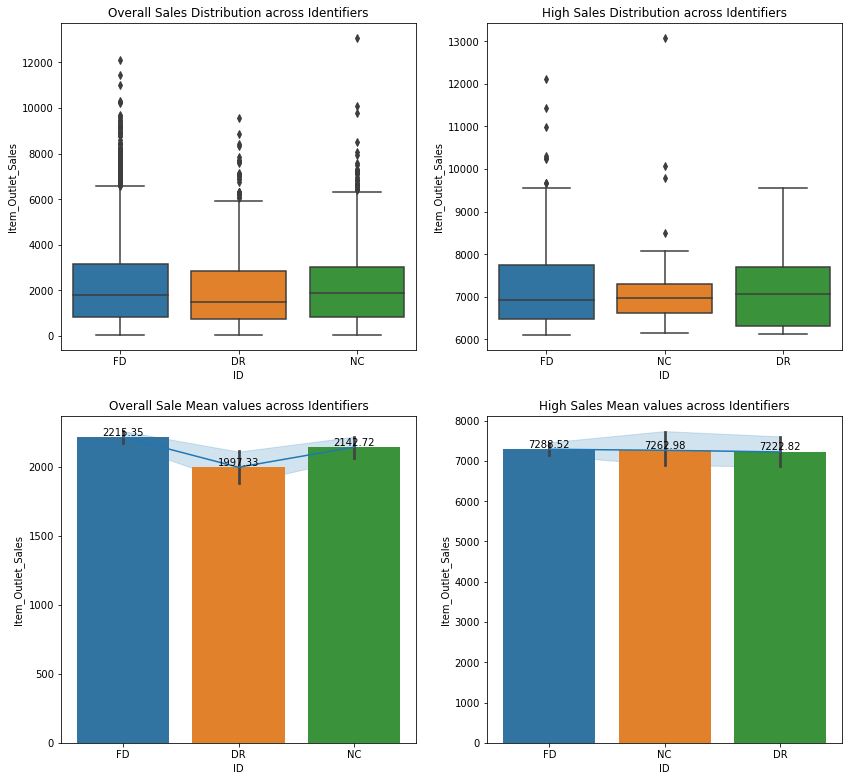

In [66]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x=df.ID,y=df.Item_Outlet_Sales)
plt.title("Overall Sales Distribution across Identifiers")

plt.subplot(2,2,2)
sns.boxplot(x=hghsales.ID,y=hghsales.Item_Outlet_Sales)
plt.title("High Sales Distribution across Identifiers")

plt.subplot(2,2,3)
fig=sns.barplot(x='ID',y='Item_Outlet_Sales',data=df,estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Overall Sale Mean values across Identifiers")
sns.lineplot(x=df.ID,y=df.Item_Outlet_Sales)


plt.subplot(2,2,4)
fig=sns.barplot(x='ID',y='Item_Outlet_Sales',data=hghsales)
fig.bar_label(fig.containers[0])
plt.title("High Sales Mean values across Identifiers")
sns.lineplot(x=hghsales.ID,y=hghsales.Item_Outlet_Sales)

plt.subplots_adjust(top=2,bottom=1)
plt.show()

we can see that Mean and the Median values of the Sales across Id's for the High Sales category ,there is no significant difference is observed.

For the overall sales Mean and the Median values are some what low  for the ID=DR(diary) compared to the others.

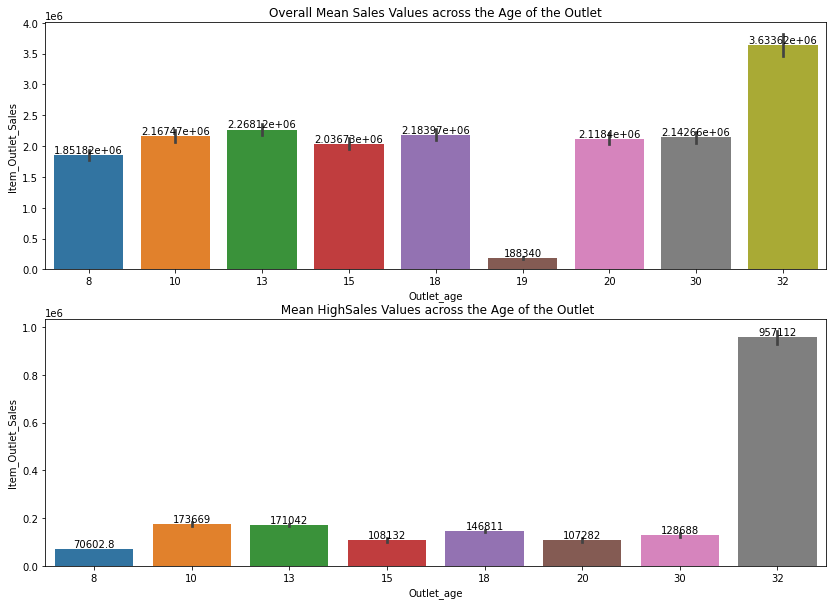

In [67]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
fig=sns.barplot(x='Outlet_age',y='Item_Outlet_Sales',data=df,estimator=np.sum)
fig.bar_label(fig.containers[0])
plt.title('Overall Mean Sales Values across the Age of the Outlet')


plt.subplot(2,1,2)
fig=sns.barplot(x='Outlet_age',y='Item_Outlet_Sales',data=hghsales,estimator=np.sum)
fig.bar_label(fig.containers[0])
plt.title(' Mean HighSales Values across the Age of the Outlet')


plt.show()

We can see that If the Age of the outlet is 32 i.e., oldest the store sales is high compared to all. Also the overall sales for the outlet whose age age is 19 means establishment year is 1998 is very low compared to all so, we need to give the special importance to that outlets and try to figure out the Reasons to improve

Pair plot for the Numeric columns :

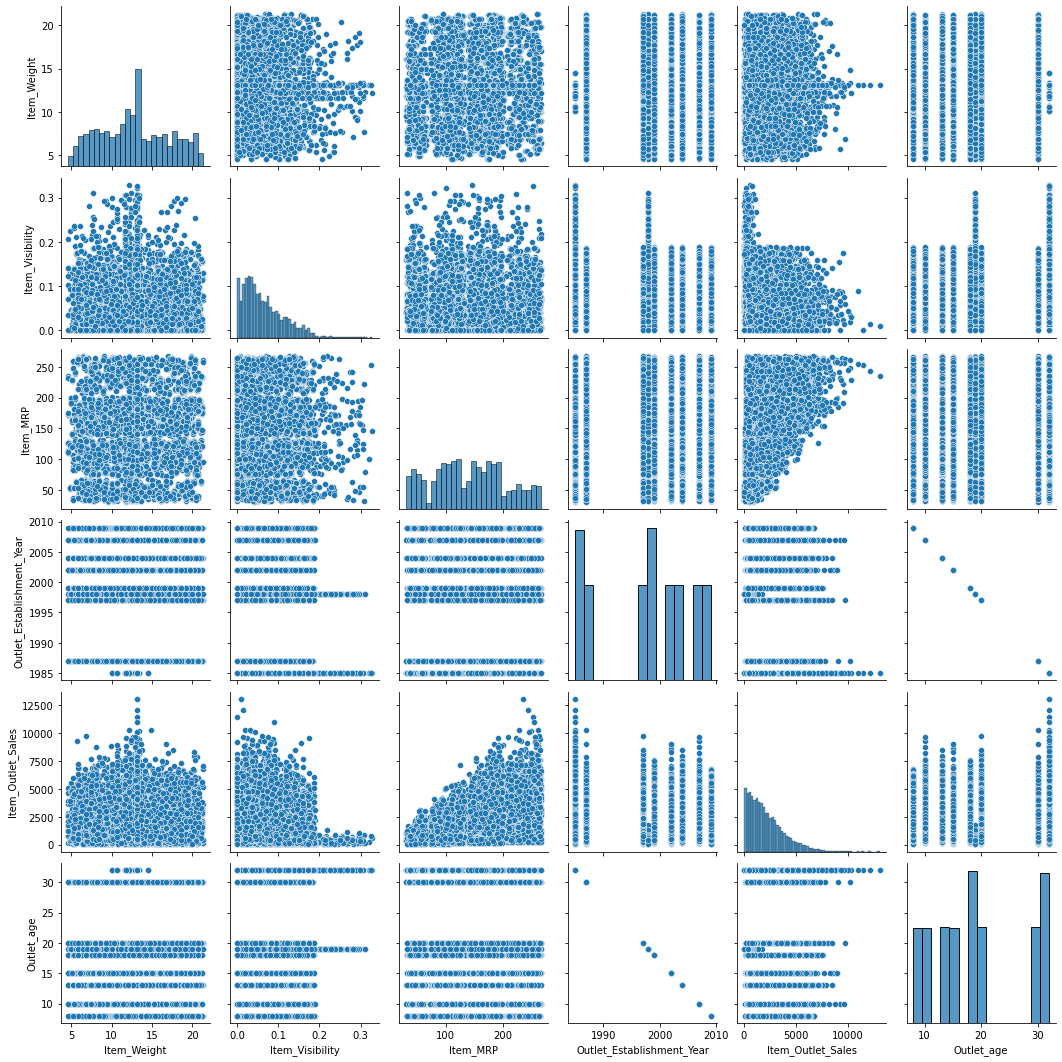

In [68]:
sns.pairplot(df)
plt.show()

correlation Plot :

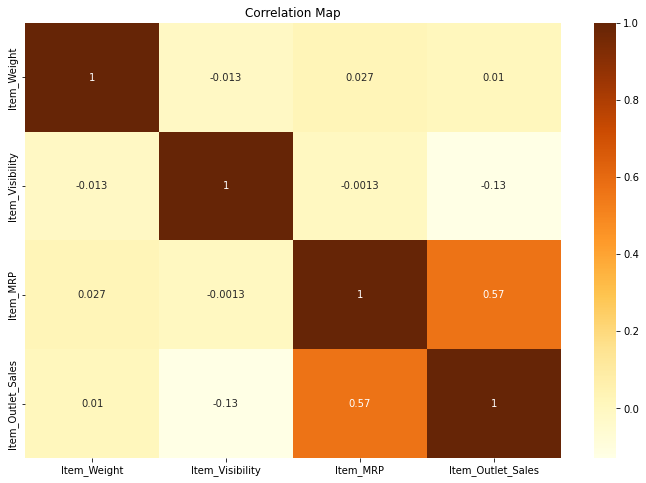

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,(df.columns != 'Outlet_age') & (df.columns != 'Outlet_Establishment_Year')].corr(),
           cmap='YlOrBr', annot=True)
plt.title("Correlation Map")
plt.show()

Dummy Variable Creation :

In [70]:
df.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ID'],
      dtype='object')

In [71]:
dummy1=pd.get_dummies(df[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                          'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ID']])
dummy1.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID_DR,ID_FD,ID_NC
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [72]:
dummy1.sum().sort_values()

Item_Type_Seafood                    64
Item_Type_Breakfast                 110
Item_Type_Starchy Foods             148
Item_Type_Others                    169
Item_Type_Hard Drinks               214
Item_Type_Breads                    251
Item_Type_Meat                      425
Item_Type_Soft Drinks               445
Item_Type_Health and Hygiene        520
Outlet_Identifier_OUT019            528
Outlet_Identifier_OUT010            555
Item_Type_Baking Goods              648
Item_Type_Canned                    649
Item_Type_Dairy                     682
ID_DR                               799
Item_Type_Frozen Foods              856
Item_Type_Household                 910
Outlet_Identifier_OUT017            926
Outlet_Identifier_OUT018            928
Outlet_Type_Supermarket Type2       928
Outlet_Identifier_OUT045            929
Outlet_Identifier_OUT046            930
Outlet_Identifier_OUT035            930
Outlet_Identifier_OUT049            930
Outlet_Identifier_OUT013            932


Here we are taking the columns for each category which is having lower count as Reference Columns ,so we need to drop those columns.

In [73]:
print("Before Dropping No of columns :",dummy1.shape[1])
dummy1=dummy1.drop(['Item_Type_Seafood','Outlet_Identifier_OUT019','ID_DR','Outlet_Type_Supermarket Type2',
                    'Item_Fat_Content_Regular','Outlet_Size_High','Outlet_Location_Type_Tier 1'],axis=1)
print("After Dropping No of columns :",dummy1.shape[1])

Before Dropping No of columns : 41
After Dropping No of columns : 34


Concatination of Dummy variables Dataframe to the original :

In [74]:
print("Before Adding No of columns :",df.shape[1])
dfnl=pd.concat([df,dummy1],axis=1)

Before Adding No of columns : 14


In [75]:
dfnl.shape  # 14 + 34 =48

(8523, 48)

In [76]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'ID', 'Outlet_age'],
      dtype='object')

Now we need to extract the X and y : 

In [77]:
# we need to drop the Dummy variable created original columns and the Item_Identifier and the Outlet_establishment_year columns
X=dfnl.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
              'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ID','Outlet_Establishment_Year',
             'Item_Outlet_Sales'],axis=1)
y=dfnl.Item_Outlet_Sales
print('X shape :', X.shape)
print('y shape',y.shape)

X shape : (8523, 38)
y shape (8523,)


Dummy Variable creation for the Given Final Test :

In [78]:
fnltest.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ID,Outlet_age
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,18
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,FD,10


In [79]:
fnltest.shape

(5681, 13)

In [80]:
dummy2=pd.get_dummies(fnltest[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                          'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ID']])
dummy2.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID_DR,ID_FD,ID_NC
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [81]:
print("Before Dropping No of columns :",dummy2.shape[1])
dummy2=dummy2.drop(['Item_Type_Seafood','Outlet_Identifier_OUT019','ID_DR','Outlet_Type_Supermarket Type2',
                    'Item_Fat_Content_Regular','Outlet_Size_High','Outlet_Location_Type_Tier 1'],axis=1)
print("After Dropping No of columns :",dummy2.shape[1])

Before Dropping No of columns : 41
After Dropping No of columns : 34


In [82]:
print("Before Adding No of columns :",fnltest.shape[1])
tfnl=pd.concat([fnltest,dummy2],axis=1)
print("After Adding No of columns :",tfnl.shape[1])

Before Adding No of columns : 13
After Adding No of columns : 47


In [83]:
Xfnl=tfnl.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
              'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ID','Outlet_Establishment_Year'],axis=1)
Xfnl.shape

(5681, 38)

we come back to this Xfnl after evaluating on the Validation set(we need to subset a test data from the given Training data).

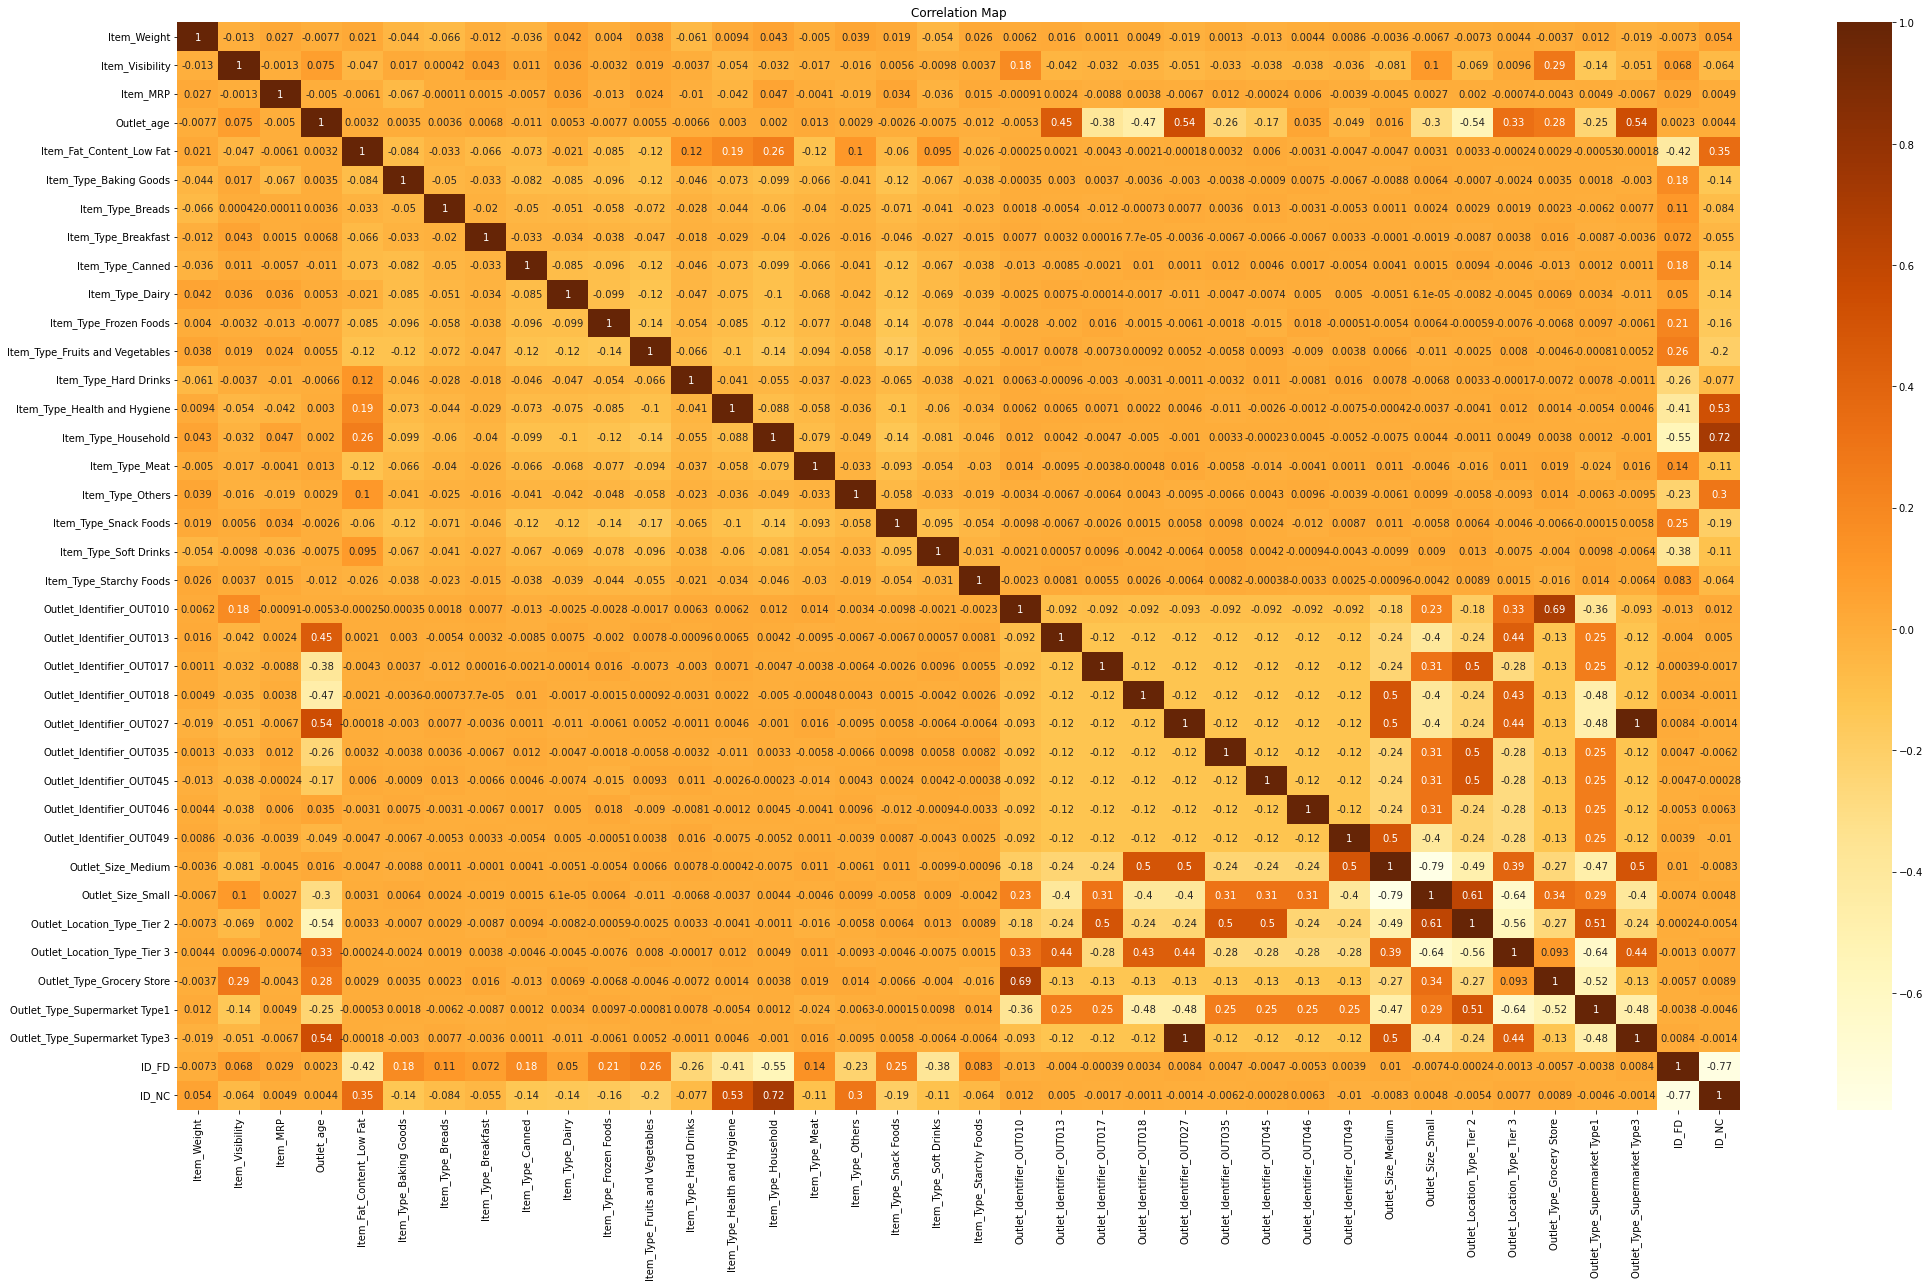

In [84]:
plt.figure(figsize=(35,20))
sns.heatmap(X.corr(),
           cmap='YlOrBr', annot=True)
plt.title("Correlation Map")
plt.show()

    -----------------------------------------------------------------------------------------------------------------

Train-Test split :

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (6818, 38)
y_train shape : (6818,)
X_test shape : (1705, 38)
y_test shape : (1705,)


Building the Base Model Using all the Variables :

In [87]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [88]:
regmdl=reg.fit(X_train,y_train)
regmdl.score(X_train,y_train)

0.5594772704192372

we got the R-Squared value for the Training set is 55.9%

In [89]:
from sklearn.metrics import r2_score

In [90]:
# Prediction on the Test Set :
y_pred=regmdl.predict(X_test)
r2_score(y_test,y_pred)

0.5792156314763033

As we can observe that the Train and Test R-squared values are some what close to each other but their values are not significant.

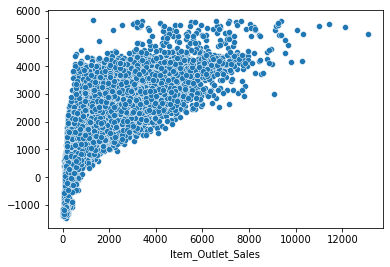

In [91]:
sns.scatterplot(x=y_train,y=regmdl.predict(X_train))
plt.show()

In [92]:
y_pred[y_pred < 0].size

93

We can see that our Linear Regression Model predicts some of the observations are Negative which makes non-sense ,
so may be Multiple Linear Regression model is not good for this Data.

But Let's see How can we Improve The Model by doing Feature Scaling and Feature Selection and Feature transformation.

Let's start with the Scaling :

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [94]:
X1_train=pd.DataFrame(scaler.fit_transform(X_train))
X1_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.294433,0.107207,0.594464,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.800536,0.144563,0.591057,0.291667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [95]:
X1_tst=pd.DataFrame(scaler.transform(X_test))
X1_tst.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.580232,0.080087,0.204332,0.916667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.200953,0.216619,0.048466,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [96]:
y1_train=np.array(y_train).reshape(-1,1)
y1_train=scaler.fit_transform(y1_train)
y1_train[:5]

array([[0.18025094],
       [0.23523411],
       [0.08364786],
       [0.01922881],
       [0.32107518]])

In [97]:
y1_test=np.array(y_test).reshape(-1,1)
y1_test=scaler.transform(y1_test)
y1_test[:5]

array([[0.13098031],
       [0.02478833],
       [0.02636948],
       [0.44012037],
       [0.17800673]])

In [98]:
# Fitting the Model for the Scaled features :
mdl1=reg.fit(X1_train,y1_train)
print("R-squared value for the Train set :",mdl1.score(X1_train,y1_train))

R-squared value for the Train set : 0.5594767738935348


In [99]:
y_pred=mdl1.predict(X1_tst)
print('R-squared value for the Test set :',r2_score(y1_test,y_pred))

R-squared value for the Test set : 0.5791995577622906


We can observe that there is no change in the Train and Test R-squared values for the scaled data and unscaled data.

Scaling does not effect the R-squared value.

Transformation :

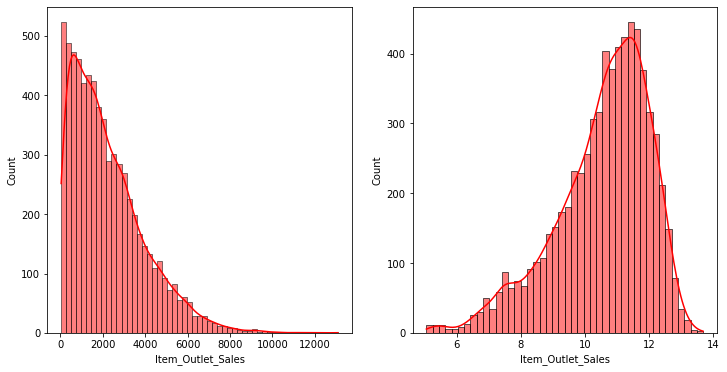

In [100]:
# let's transform the y-variable and see the predictions.
# First we will see the distribution and decide which transformation we will apply
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(y_train,kde=True,color='r')
# since it is right skewed we will apply the Log transformation.

ylog_train=np.log2(y_train)
plt.subplot(1,2,2)
sns.histplot(ylog_train,kde=True,color='r')

plt.show()

As we can see that the distribution after we applied is changed and is somewhat better.

Note : There is no assumption regarding the Distribution of the Target Variable.

In [101]:
# Let's see the Transformed values 
ylog_test = np.log2(y_test)
mdl2=reg.fit(X_train,ylog_train)
print("R-squared value for the Train set :",mdl2.score(X_train,ylog_train))

R-squared value for the Train set : 0.718532691505954


In [102]:
# Let's see on the Test set :
ylog_pred=mdl2.predict(X_test)
print("R-squared value for the Test set :",r2_score(ylog_test,ylog_pred))

R-squared value for the Test set : 0.7302259939188244


As we can see that the model is Improved 

Cross Validation :

In [103]:
# let's apply cross Validation and see whether the model is stable or not.
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=mdl2,X=X_train,y=ylog_train,cv=5,n_jobs=-1)

array([0.72420436, 0.70033516, 0.71001732, 0.72612105, 0.71671087])

We can see that the Model is stable because all the cross-validation scores lie close to each other.

Now the model we built is based on all the available features. so, let's do some feature selection

Recursive Feature Elimination Using Cross - Validation :

In [104]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=reg,cv=4)

In [105]:
%%time
rfecv.fit(X_train,ylog_train)

Wall time: 357 ms


RFECV(cv=4, estimator=LinearRegression())

In [106]:
# we can see the Mean scores of the cross -validation by using :
rfecv.grid_scores_

array([0.33355455, 0.37693335, 0.4299064 , 0.42988103, 0.43035004,
       0.4315123 , 0.43139906, 0.44699695, 0.44648946, 0.45355621,
       0.45369427, 0.45421521, 0.45453054, 0.4536385 , 0.45371921,
       0.45369309, 0.4543577 , 0.45590338, 0.45574826, 0.45556111,
       0.45629532, 0.45609937, 0.45604061, 0.45586699, 0.45597599,
       0.45584998, 0.45572051, 0.45562789, 0.45561737, 0.52002698,
       0.52011309, 0.52011045, 0.52011528, 0.52009076, 0.52006899,
       0.64640424, 0.71470526, 0.71476679])

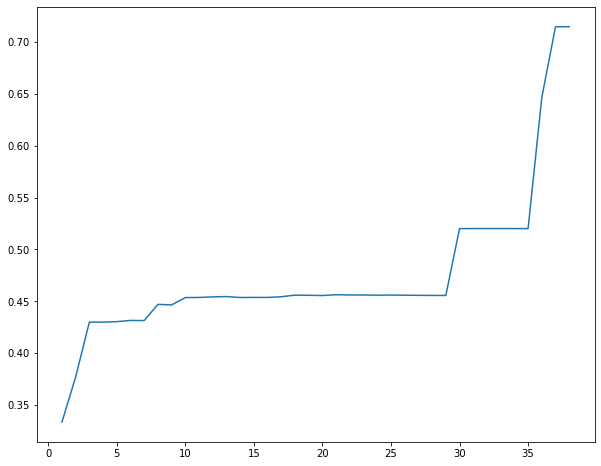

In [107]:
# we can see the plot for the No of features and the Mean score values of the R-squared :
plt.figure(figsize=(10,8))
plt.plot(range(1,X_train.shape[1]+1),rfecv.grid_scores_)
plt.show()

As we can see that when we use all the features ,then only we are getting 70% R-squared value

Also,we have 38 features and we can observe that at the top right corner in the plot there is a flat curve.

In [108]:
# Observe the Best No of features :
rfecv.n_features_

38

We can see all the Features are Used in the Model.

Let's apply it to the final given test.

Residual Analysis for the Train set :

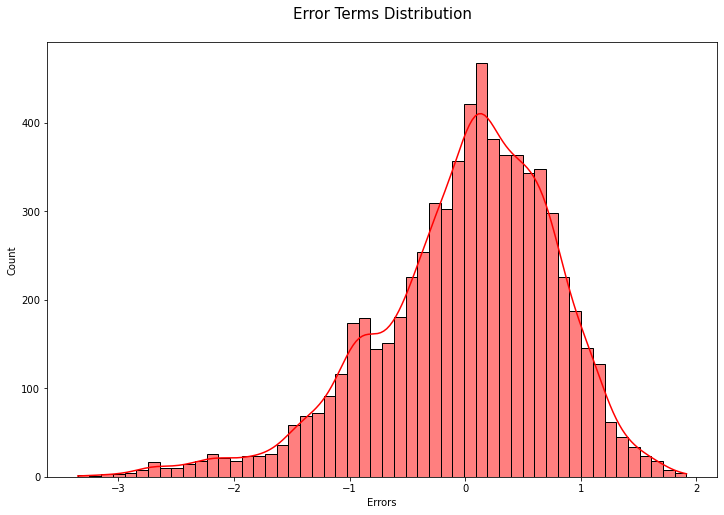

In [109]:
residuals=np.array(ylog_train) - np.array(mdl2.predict(X_train))
plt.figure(figsize=(12,8))
sns.histplot(residuals,kde=True,color='r')
plt.title("Error Terms Distribution\n",fontsize=15)
plt.xlabel("Errors")
plt.show()

We can see that error terms Distribution is somewhat Normal

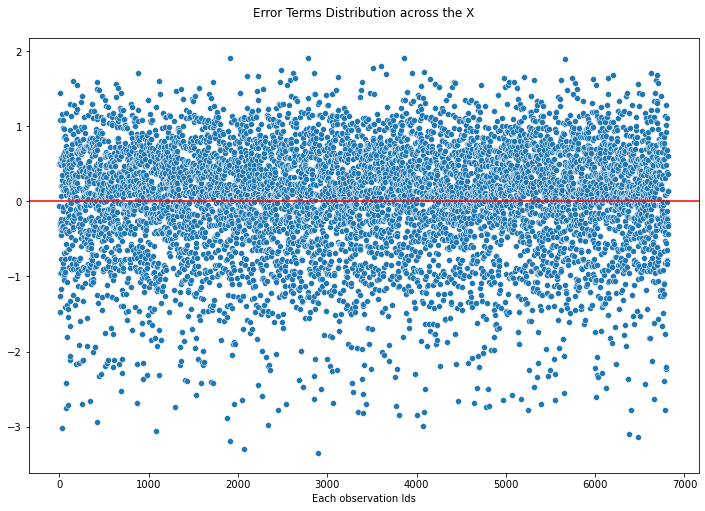

In [110]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(X_train.shape[0]),y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Error Terms Distribution across the X\n")
plt.xlabel("Each observation Ids")
plt.show()

we can observe from the above plot we can conclude that it is Homoscedastic.Also there is no pattern observed i.e., there is a constant variance

In [111]:
y_predict=mdl2.predict(Xfnl)
y_predict[:5]

array([10.46374685, 10.13955115,  9.22564169, 11.04354221, 12.60215342])

In [112]:
y_predict=np.exp2(y_predict)
y_predict[:5]

array([1412.21776013, 1127.99984546,  598.68017828, 2110.75322908,
       6217.64883494])

In [113]:
pd.DataFrame(y_predict).to_excel(r"Bigmartsalesprediction.xlsx")
print('Predicted values is written to Excel File successfully.')

Predicted values is written to Excel File successfully.


### Conclusion :
*   Feature Transformation is applied to improve the accuracy score.
*   Residual Analysis is done to check the validation of Multiple Linear Regression Assumptions.
*   Cross- Validation scheme is used to verify whether the Model is stable or not.
*   Here We built a model using sklearn but in order to get the statistical significance of the Model and the Variable Co-   efficients we can also use the StatsModel.